<a href="https://colab.research.google.com/github/khanhduy0703/desktop-tutorial/blob/main/ti%C3%AAu_%C4%91%C6%B0%E1%BB%9Dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install gradio scikit-learn tensorflow pandas --quiet

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📋 Cấu trúc mạng nơ-ron:


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6906 - loss: 0.6535 - val_accuracy: 0.7208 - val_loss: 0.5660
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7426 - loss: 0.5365 - val_accuracy: 0.7338 - val_loss: 0.5108
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7670 - loss: 0.4871 - val_accuracy: 0.7468 - val_loss: 0.5011
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7807 - loss: 0.4610 - val_accuracy: 0.7468 - val_loss: 0.4973
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7940 - loss: 0.4431 - val_accuracy: 0.7338 - val_loss: 0.4984
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8039 - loss: 0.4296 - val_accuracy: 0.7338 - val_loss: 0.4983
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8187 - loss: 0.4172 - val_accuracy: 0.7403 - val_loss: 0.5000
Epoch 8/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8210 - loss: 0.4064 - val_accuracy: 0.7468 -

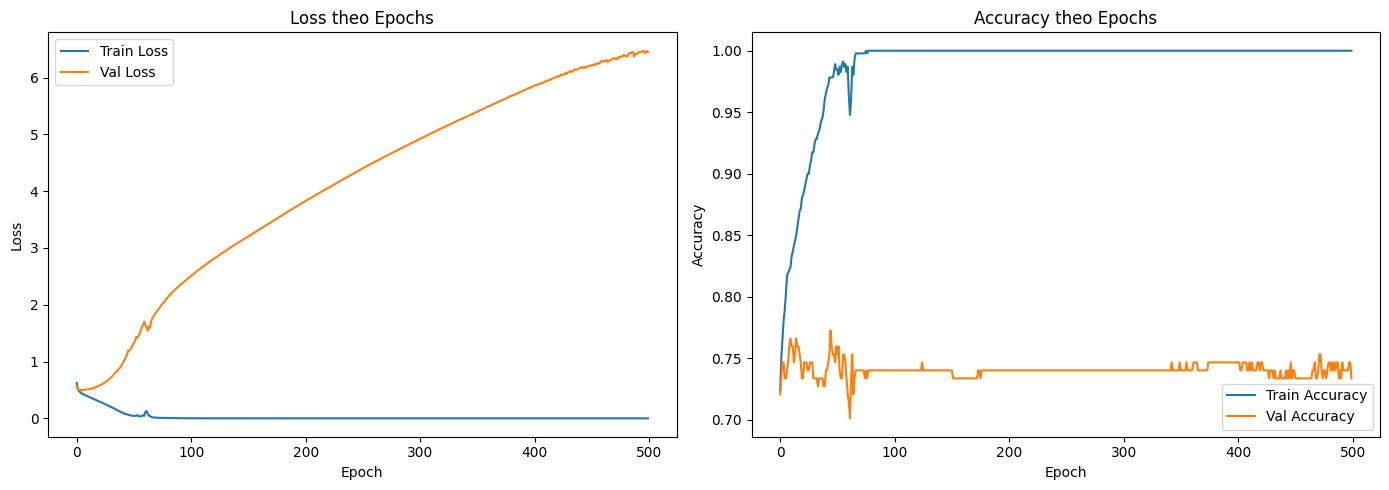

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# 1. Seed cho phép tái lập (có thể bỏ nếu muốn random)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Tải dữ liệu
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# 3. Xử lý giá trị 0 không hợp lý
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, df[col].mean())

# 4. Tách dữ liệu
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 7. Xây mạng nơ-ron mạnh hơn (Deep ANN)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# 8. Compile
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 9. In kiến trúc
print("\n📋 Cấu trúc mạng nơ-ron:")
model.summary()

# 10. Train đủ 300 epoch, không dừng sớm, batch nhỏ, validation kỹ, cân bằng class
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=8,
    validation_split=0.25,
    verbose=1,
    class_weight=class_weight_dict # Pass the class weight dictionary here
)

# 11. Dự đoán và đánh giá
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_classes)
print(f"\n🎯 Accuracy trên tập test: {acc:.4f}")
print("\n📊 Báo cáo phân loại:\n", classification_report(y_test, y_pred_classes))

# 12. Vẽ biểu đồ Loss & Accuracy
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
# 3. Giao diện Gradio
import gradio as gr

# Danh sách label tiếng Việt + đơn vị
input_fields = [
    ("Pregnancies", "Số lần mang thai (lần)"),
    ("Glucose", "Đường huyết (mg/dL)"),
    ("BloodPressure", "Huyết áp (mmHg)"),
    ("SkinThickness", "Độ dày da (mm)"),
    ("Insulin", "Insulin (mu U/ml)"),
    ("BMI", "Chỉ số BMI (kg/m²)"),
    ("DiabetesPedigreeFunction", "Tiền sử gia đình (DPF)"),
    ("Age", "Tuổi (năm)")
]

# Giá trị mặc định theo median
defaults = [float(df[col].median()) for col, _ in input_fields]

# Hàm dự đoán
def predict_diabetes(*vals):
    try:
        vals = [float(v if v is not None else 0.0) for v in vals]
        input_np = np.array(vals).reshape(1, -1)
        scaled = scaler.transform(input_np)
        prob = model.predict(scaled)[0][0]
        percent = f"{prob * 100:.2f}%"
        if prob > 0.5:
            msg = f"⚠️ Nguy cơ bị tiểu đường cao ({percent})"
        else:
            msg = f"✅ Nguy cơ thấp ({percent})"
        return msg
    except Exception as e:
        return f"Lỗi: {str(e)}"

# Tạo Blocks layout
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## 🧠 Ứng dụng dự đoán nguy cơ **tiểu đường**")
    gr.Markdown("Nhập các thông tin sức khỏe bên dưới, sau đó nhấn **Dự đoán**.")

    inputs = []
    with gr.Row():
        with gr.Column():
            for i in range(0, 4):
                name, label = input_fields[i]
                val = defaults[i]
                inp = gr.Number(label=f"{label}", value=val)
                inputs.append(inp)
        with gr.Column():
            for i in range(4, 8):
                name, label = input_fields[i]
                val = defaults[i]
                inp = gr.Number(label=f"{label}", value=val)
                inputs.append(inp)

    btn = gr.Button("📊 Dự đoán ngay")
    output = gr.Textbox(label="Kết quả", lines=1)

    btn.click(fn=predict_diabetes, inputs=inputs, outputs=output)

# Chạy demo
demo.launch(share=True)  # share=True để tạo link chia sẻ public


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://84b83078ded955e262.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
